In [55]:
#Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
final = pd.read_csv('../data/final.csv', index_col=0)

## Exploratory Data Analysis

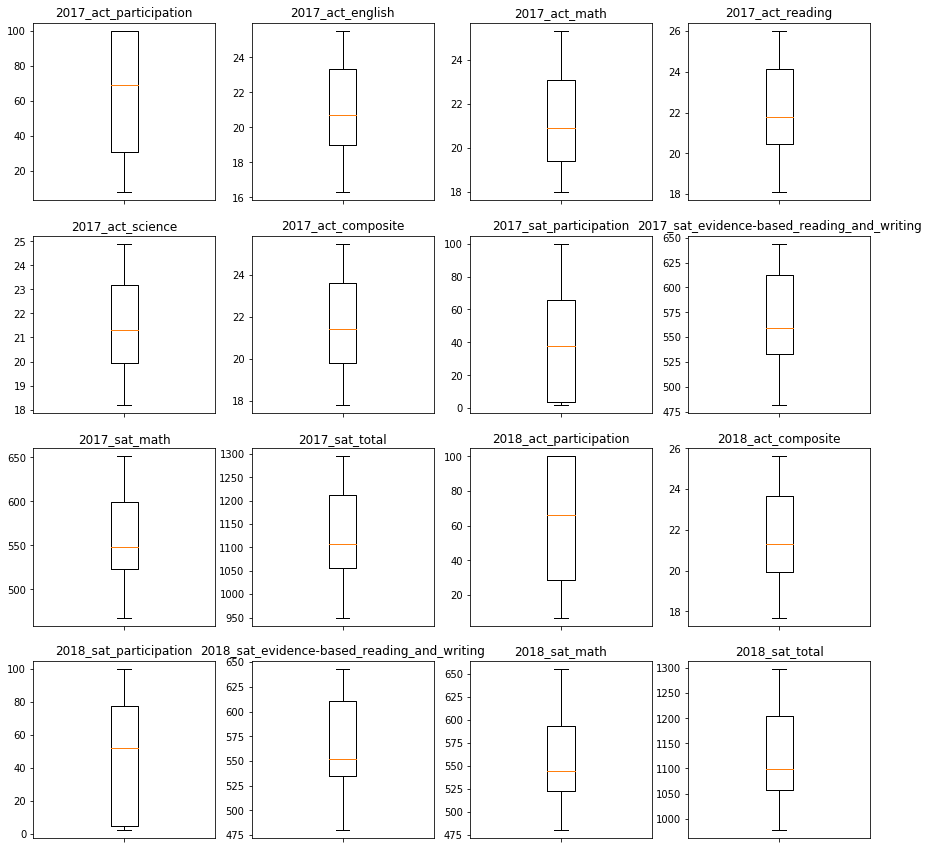

In [6]:
columns = list(final.columns[1:])

fig, ax = plt.subplots(nrows=4, ncols=4, figsize = (15,15))  
ax = ax.ravel()
for i, column in enumerate(columns):
    ax[i].boxplot(final[column])
    ax[i].set_title(f'{column}', fontsize=12)
    ax[i].set_xticklabels('')

There are no major outliers in this data.

For the participation columns, the boxes, which represent the middle 50% of observations (the interquartile range), seem to be bunched toward 100 percent for the ACT and zero percent for the SAT. Focusing on the plots of the participation rates, this is more evident:

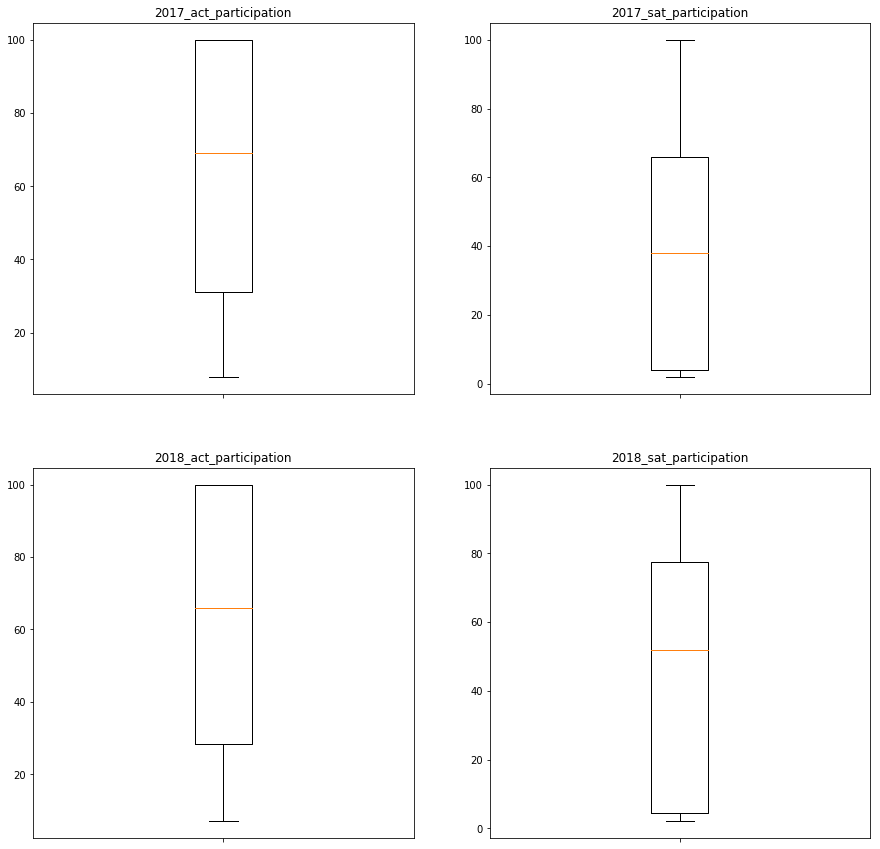

In [7]:
columns = ['2017_act_participation', '2017_sat_participation', '2018_act_participation', '2018_sat_participation']

fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (15,15))  
ax = ax.ravel()
for i, column in enumerate(columns):
    ax[i].boxplot(final[column])
    ax[i].set_title(f'{column}', fontsize=12)
    ax[i].set_xticklabels('')

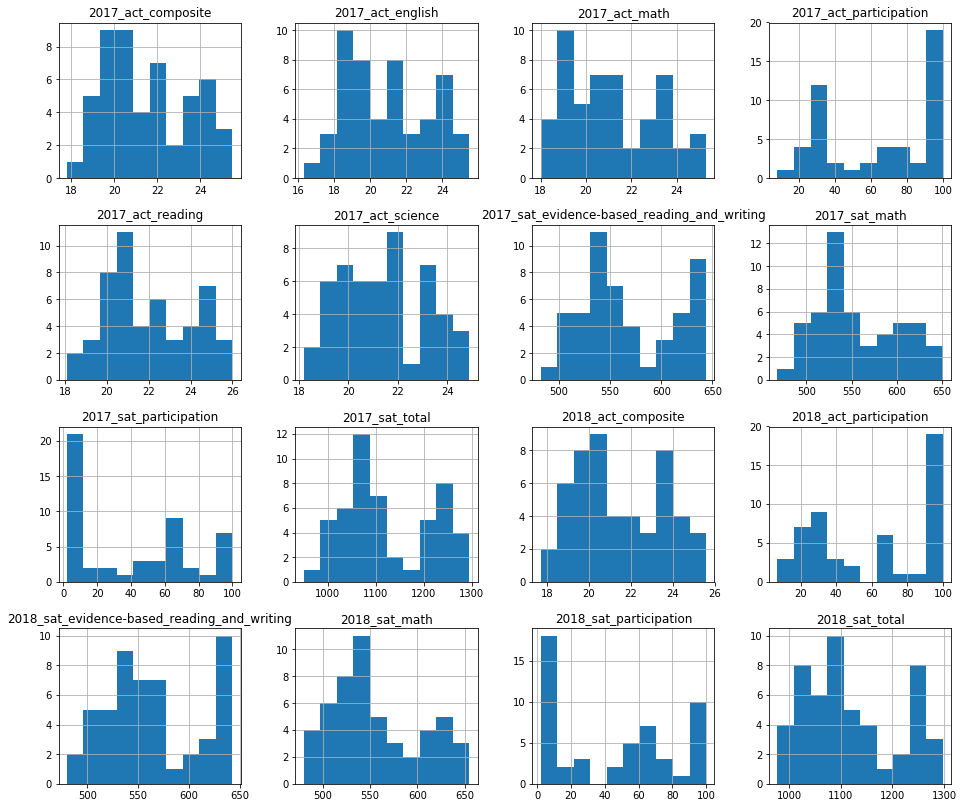

In [8]:
final.hist(figsize=(16,14));

In [9]:
def subplot_histograms(dataframe, list_of_columns, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2))
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (16,9))  
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns):
        ax[i].hist(dataframe[column])
        ax[i].set_title(f'distribution of {column}', fontsize=18)
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].axvline(dataframe[column].mean(), c='r')
        fig.tight_layout()

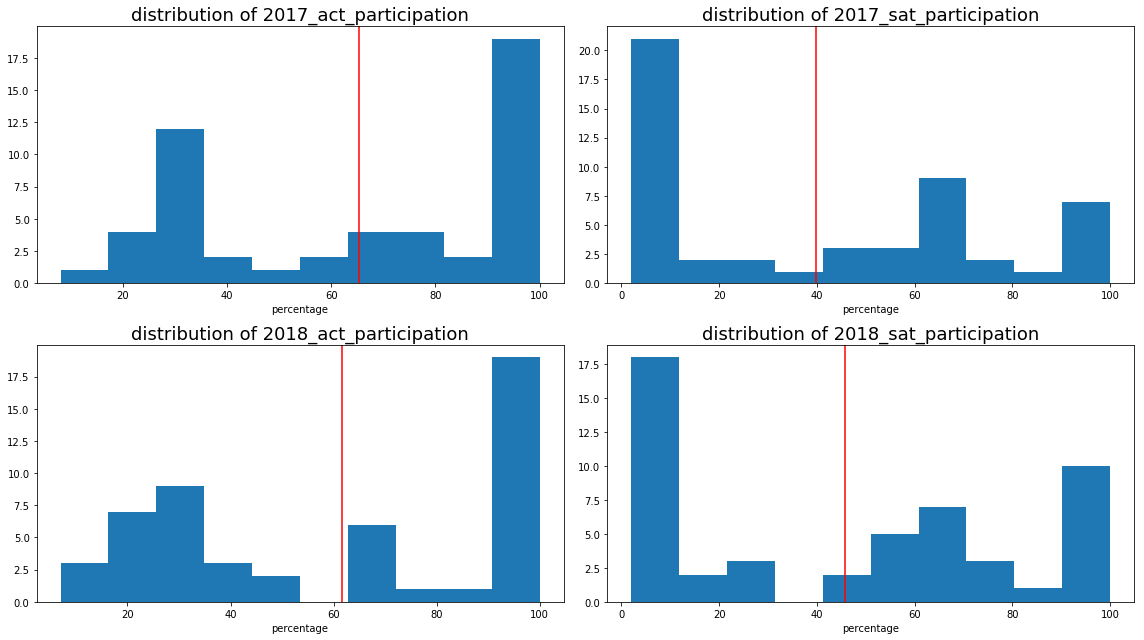

In [10]:
# histograms of participation rates
columns = ['2017_act_participation', '2017_sat_participation', '2018_act_participation', '2018_sat_participation']
xlabels = ['percentage','percentage','percentage','percentage']
subplot_histograms(final, columns, xlabels)

For both 2017 and 2018, large numbers of states have 100-percent participation on the ACT, and a similarly large number have close to zero-percent participation rates on the SAT.

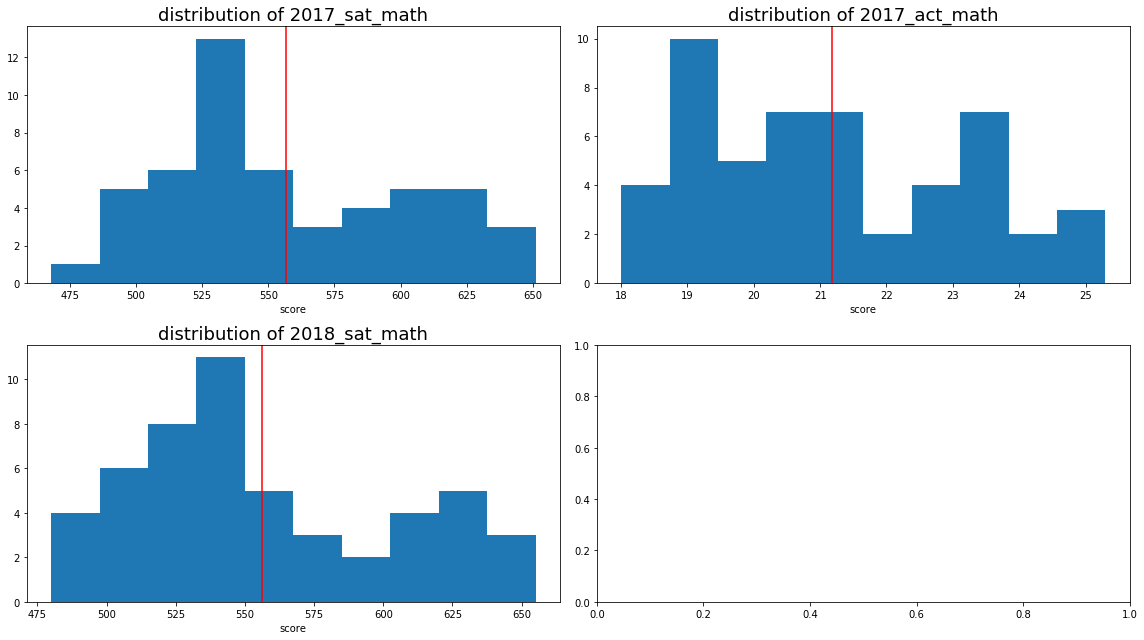

In [11]:
# histograms of math scores
columns = ['2017_sat_math', '2017_act_math', '2018_sat_math']
xlabels = ['score', 'score', 'score']
subplot_histograms(final, columns, xlabels)

For all three sets of math scores, the distribution appears to be bimodal.

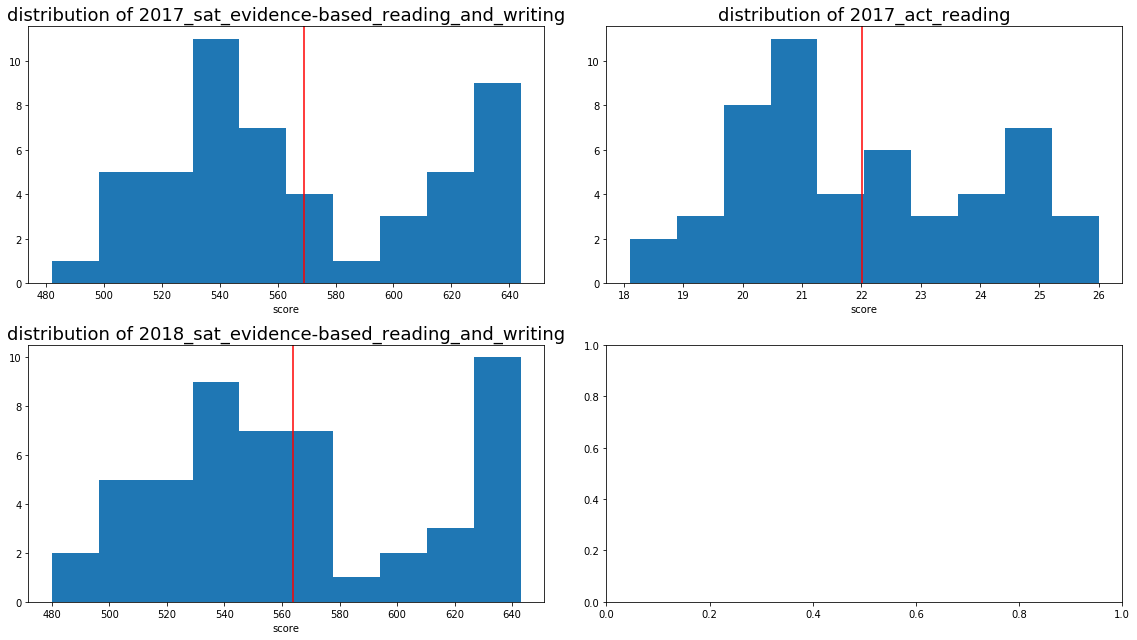

In [12]:
# histograms of reading scores
columns = ['2017_sat_evidence-based_reading_and_writing', '2017_act_reading', '2018_sat_evidence-based_reading_and_writing']
xlabels = ['score', 'score', 'score']
subplot_histograms(final, columns, xlabels)

Reading scores also appear to be bimodal.

In [13]:
def state_data(param, ascending_bool=True, header=10):
    return final[['state', param]].sort_values(param, ascending = ascending_bool).head(header)

In [14]:
# 2017 SAT highest participation
state_data('2017_sat_participation', False)

,state,2017_sat_participation
8,District of Columbia,100
22,Michigan,100
6,Connecticut,100
7,Delaware,100
29,New Hampshire,96
19,Maine,95
12,Idaho,93
9,Florida,83
21,Massachusetts,76
39,Rhode Island,71


District of Columbia, Delaware, Michigan, and Connecticut had 100% participation on the 2017 SAT.

In [15]:
# 2017 SAT lowest participation
state_data('2017_sat_participation', header=20)

,state,2017_sat_participation
34,North Dakota,2
24,Mississippi,2
15,Iowa,2
25,Missouri,3
44,Utah,3
41,South Dakota,3
27,Nebraska,3
49,Wisconsin,3
23,Minnesota,3
50,Wyoming,3


North Dakota, Mississippi, and Iowa had the lowest participation rates for the 2017 SAT.

In [16]:
# 2018 SAT highest participation
state_data('2018_sat_participation', False)

,state,2018_sat_participation
5,Colorado,100
6,Connecticut,100
7,Delaware,100
22,Michigan,100
12,Idaho,100
19,Maine,99
13,Illinois,99
39,Rhode Island,97
29,New Hampshire,96
8,District of Columbia,92


Colorado, Connecticut, Delaware, Michigan, and Idaho had 100% participation on the 2018 SAT

In [17]:
# 2018 SAT lowest participation
state_data('2018_sat_participation', True, 20)

,state,2018_sat_participation
34,North Dakota,2
50,Wyoming,3
41,South Dakota,3
27,Nebraska,3
49,Wisconsin,3
24,Mississippi,3
15,Iowa,3
44,Utah,4
23,Minnesota,4
18,Louisiana,4


North Dakota had the lowest participation rate on the 2018 SAT (2%). Wyoming, South Dakota, Nebraska, Wisconsin, Mississippi, and Iowa followed closely with 3% participation rates.

In [18]:
# 2017 ACT highest participation
state_data('2017_act_participation', False, 18)

,state,2017_act_participation
0,Alabama,100
17,Kentucky,100
49,Wisconsin,100
44,Utah,100
42,Tennessee,100
40,South Carolina,100
36,Oklahoma,100
33,North Carolina,100
28,Nevada,100
26,Montana,100


Alabama, Arkansas, Colorado, Kentucky, Louisiana, Minnesota, Mississippi, Missouri, Montana, Nevada, North Carolina, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin, and Wyoming had 100% participation on the 2017 ACT.

In [19]:
# 2017 ACT lowest participation
state_data('2017_act_participation', True, 6)

,state,2017_act_participation
19,Maine,8
29,New Hampshire,18
7,Delaware,18
39,Rhode Island,21
38,Pennsylvania,23
20,Maryland,28


Maine had the lowest partipation on the 2017 ACT, 8%.

New Hampshire, Delaware, Rhode Island, and Pennsylvania had the next four lowest participation rates.

In [20]:
# 2018 ACT highest participation
state_data('2018_act_participation', False, 18)

,state,2018_act_participation
0,Alabama,100
17,Kentucky,100
49,Wisconsin,100
44,Utah,100
42,Tennessee,100
40,South Carolina,100
36,Oklahoma,100
35,Ohio,100
33,North Carolina,100
28,Nevada,100


Alabama, Kentucky, Wisconsin, Utah, Tennessee, South Carolina, Oklahoma, Ohio, North Carolina, Nevada, Nebraska, Montana, Mississippi, Louisiana, Missouri, Wyoming, and Arkansas had 100% participation on the 2018 ACT.

In [21]:
# 8. 2018 ACT lowest participation
state_data('2018_act_participation')

,state,2018_act_participation
19,Maine,7
39,Rhode Island,15
29,New Hampshire,16
7,Delaware,17
38,Pennsylvania,20
22,Michigan,22
47,Washington,24
45,Vermont,24
46,Virginia,24
21,Massachusetts,25


Maine, Rhode Island, New Hampshire, and Delaware had the lowest participation rates on the 2018 ACT

In [22]:
# 2017 SAT highest total scores
state_data('2017_sat_total', False)

,state,2017_sat_total
23,Minnesota,1295
49,Wisconsin,1291
15,Iowa,1275
25,Missouri,1271
16,Kansas,1260
34,North Dakota,1256
27,Nebraska,1253
17,Kentucky,1247
24,Mississippi,1242
44,Utah,1238


Minnesota, Wisconsin, Iowa, and Missouri had the highest average total score on the 2017 SAT.

In [23]:
# 2017 SAT lowest total scores
state_data('2017_sat_total')

,state,2017_sat_total
8,District of Columbia,950
7,Delaware,996
12,Idaho,1005
22,Michigan,1005
19,Maine,1012
9,Florida,1017
43,Texas,1020
6,Connecticut,1041
36,Oklahoma,1047
10,Georgia,1050


The District of Columbia, Delaware, Idaho, and Michigan had the lowest average total scores on the 2017 SAT.

In [24]:
# 2018 SAT highest total scores
state_data('2018_sat_total', False)

,state,2018_sat_total
23,Minnesota,1298
49,Wisconsin,1294
34,North Dakota,1283
15,Iowa,1265
16,Kansas,1265
25,Missouri,1262
50,Wyoming,1257
27,Nebraska,1252
17,Kentucky,1248
41,South Dakota,1240


Minnesota, Wisconsin, North Dakota, and Iowa had the highest average total scores on the 2018 SAT.

In [25]:
# 2018 SAT lowest total scores
state_data('2018_sat_total')

,state,2018_sat_total
8,District of Columbia,977
7,Delaware,998
48,West Virginia,999
12,Idaho,1001
44,Utah,1010
11,Hawaii,1010
22,Michigan,1011
19,Maine,1013
39,Rhode Island,1018
13,Illinois,1019


The District of Columbia, Delaware, West Virginia, and Idaho had the lowest average total scores on the 2018 SAT.

In [26]:
# 2017 ACT highest total scores
state_data('2017_act_composite', False)

,state,2017_act_composite
29,New Hampshire,25.5
21,Massachusetts,25.4
6,Connecticut,25.2
19,Maine,24.3
8,District of Columbia,24.2
32,New York,24.2
22,Michigan,24.1
7,Delaware,24.1
39,Rhode Island,24.0
30,New Jersey,23.9


New Hampshire, Massachusetts, Connecticut, and Maine had the highest average composite scores on the 2017 ACT.

In [27]:
# 2017 ACT lowest total scores
state_data('2017_act_composite')

,state,2017_act_composite
28,Nevada,17.8
24,Mississippi,18.6
40,South Carolina,18.7
11,Hawaii,19.0
33,North Carolina,19.1
0,Alabama,19.2
3,Arkansas,19.4
36,Oklahoma,19.4
18,Louisiana,19.5
2,Arizona,19.7


Nevada, Mississippi, South Carolina, and Hawaii had the lowest average composite scores on the 2017 ACT.

In [28]:
# 2018 ACT highest total scores
state_data('2018_act_composite', False)

,state,2018_act_composite
6,Connecticut,25.6
21,Massachusetts,25.5
29,New Hampshire,25.1
32,New York,24.5
22,Michigan,24.2
39,Rhode Island,24.2
45,Vermont,24.1
19,Maine,24.0
13,Illinois,23.9
5,Colorado,23.9


Connecticut, Massachusetts, New Hampshire, and New York had the highest average composite scores on the 2018 ACT.

In [29]:
# 2018 ACT lowest total scores
state_data('2018_act_composite')

,state,2018_act_composite
28,Nevada,17.7
40,South Carolina,18.3
24,Mississippi,18.6
11,Hawaii,18.9
0,Alabama,19.1
33,North Carolina,19.1
2,Arizona,19.2
18,Louisiana,19.2
36,Oklahoma,19.3
3,Arkansas,19.4


Nevada, South Carolina, Mississippi, and Hawaii had the lowest average composite scores on the 2018 ACT.

In [34]:
# define a function to check states whose participation either
# increased to 100 percent from 2017 to 2018 or
# decrease from 100 percent from 2017 to 2018

def check_100_change(param1, param2):
    change1 = (final[param1] == 100) & (final[param2] != 100)
    change2 = (final[param1] != 100) & (final[param2] == 100)
    mask = change1 | change2
    temp = final[mask]
    return temp[['state', param1, param2]]

In [35]:
check_100_change('2017_sat_participation', '2018_sat_participation')

,state,2017_sat_participation,2018_sat_participation
5,Colorado,11,100
8,District of Columbia,100,92
12,Idaho,93,100


Colorado's SAT participation rate increased from 11% to 100%. That's a huge increase and definitely worth investigating.

DC's SAT participation declined from 100% to 92%.  
Idaho's SAT participation rate increased from 93% to 100%.

In [36]:
check_100_change('2017_act_participation', '2018_act_participation')

,state,2017_act_participation,2018_act_participation
5,Colorado,100,30
23,Minnesota,100,99
27,Nebraska,84,100
35,Ohio,75,100


Colorado's ACT participation rate decreased from 100% to 11% from 2017 to 2018.  
Minnesota's ACT participation rate decreased from 100% to 99% from 2017 to 2018.

Nebraska's ACT participation rate increased from 84% to 100% from 2017 to 2018.  
Ohio's ACT participation rate increased from 75% to 100% from 2017 to 2018.

In [40]:
# define a function to identify states with 
# greater than 50% participation on both tests in a given year

def check_over_50(param1, param2):
    mask = (final[param1] > 50) & (final[param2] > 50)
    temp = final[mask]
    return temp[['state', param1, param2]]

In [38]:
check_over_50('2017_act_participation', '2017_sat_participation')

,state,2017_act_participation,2017_sat_participation
9,Florida,73,83
10,Georgia,55,61
11,Hawaii,90,55


In 2017, the following states had over 50% participation on both ACT and SAT:
- Florida
- Georgia
- Hawaii

In [39]:
check_over_50('2018_act_participation', '2018_sat_participation')

,state,2018_act_participation,2018_sat_participation
9,Florida,66,56
10,Georgia,53,70
11,Hawaii,89,56
33,North Carolina,100,52
40,South Carolina,100,55


In 2018, the following stats had over 50% participation on both ACT and SAT:
- Florida 
- Georgia
- Hawaii
- North Carolina
- South Carolina

Based on these findings, I am most interested in Colorado, because its SAT participation rate increased significantly (11% to 100%) from 2017 to 2018. Looking further into this, the increase in participation rates for Colorado and Illinois far exceeded that of any other states.

In [45]:
final['sat_participation_increase'] = final['2018_sat_participation'] - final['2017_sat_participation']
final[['state','sat_participation_increase']].sort_values('sat_participation_increase', ascending=False).head()

,state,sat_participation_increase
13,Illinois,90
5,Colorado,89
39,Rhode Island,26
48,West Virginia,14
30,New Jersey,12


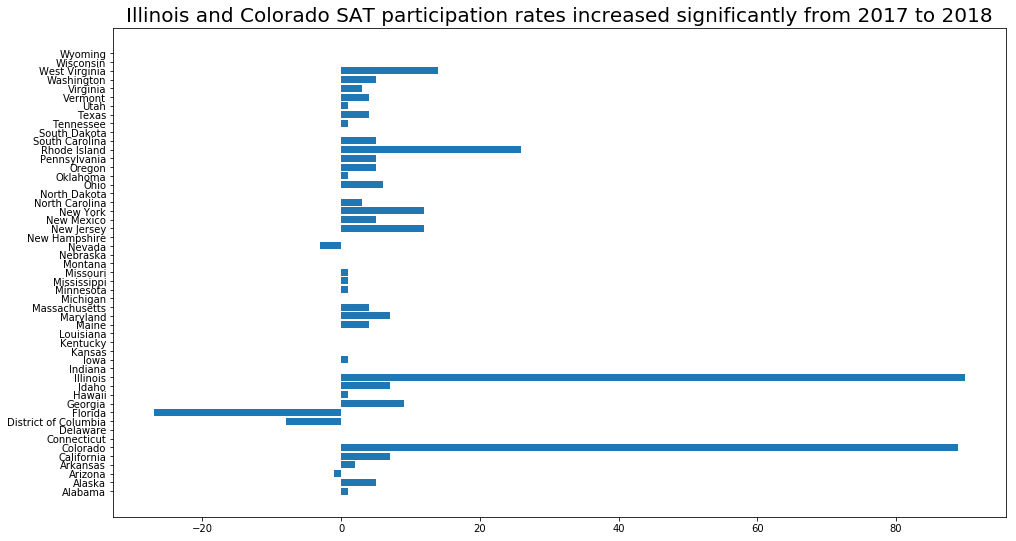

In [53]:
plt.figure(figsize=(16,9))
plt.barh(final['state'], final['sat_participation_increase'])
plt.title('Illinois and Colorado SAT participation rates increased significantly from 2017 to 2018', 
          fontsize = 20);
#plt.savefig('percent_change.png')

In [47]:
final['act_participation_increase'] = final['2018_act_participation'] - final['2017_act_participation']
final[['state','act_participation_increase']].sort_values('act_participation_increase', ascending=False).head()

,state,act_participation_increase
35,Ohio,25
27,Nebraska,16
2,Arizona,4
20,Maryland,3
37,Oregon,2


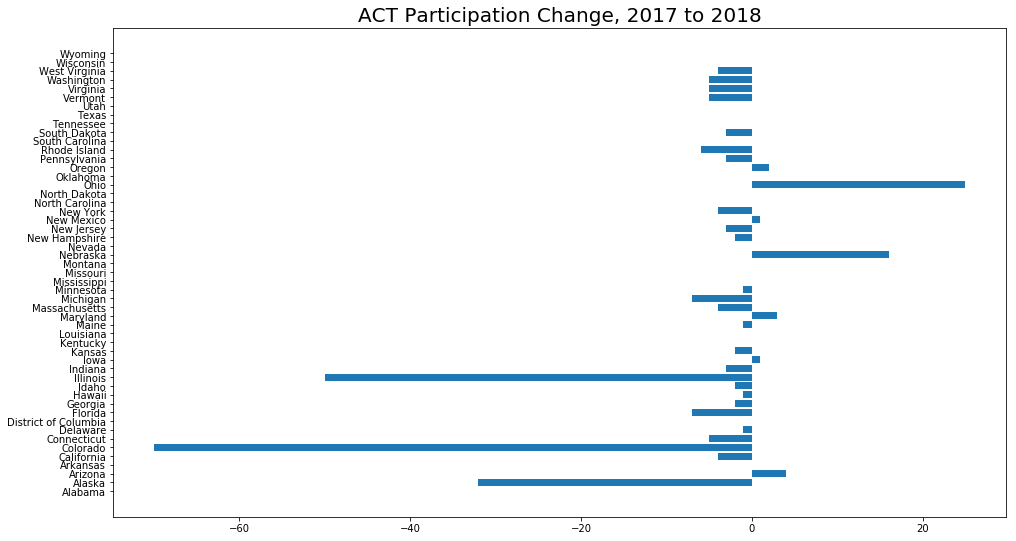

In [50]:
plt.figure(figsize=(16,9))
plt.barh(final['state'], final['act_participation_increase'])
plt.title('ACT Participation Change, 2017 to 2018', fontdict={'fontsize':20});
#plt.savefig('percent_change.png')

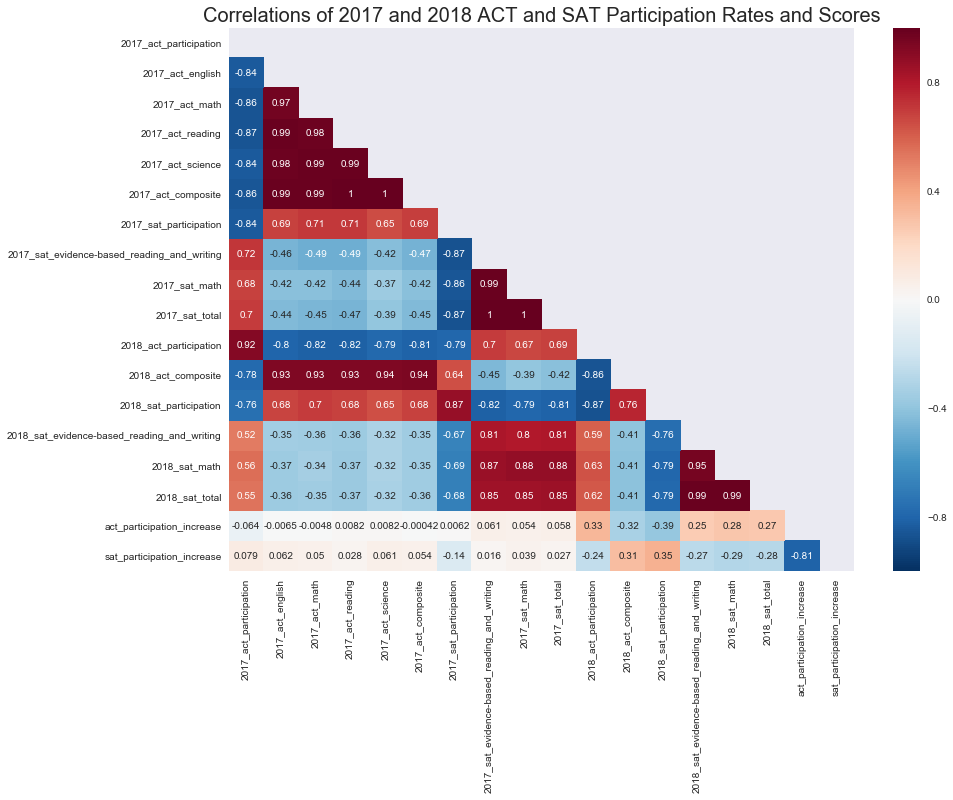

In [56]:
plt.figure(figsize=(14,10))
corr = final.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True # only show lower triangle
ax = plt.axes()
sns.heatmap(final.corr(), annot=True, mask=mask)
ax.set_title('Correlations of 2017 and 2018 ACT and SAT Participation Rates and Scores', fontsize=20);
# referenced https://seaborn.pydata.org/examples/many_pairwise_correlations.html

There are strong correlations between participation rates and scores.

Higher rates of participation on a given test correspond to lower scores on that test and higher scores on the other exam.